In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

### Importing the dataset

In [190]:
df=pd.read_csv("dataframe_.csv")
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


### finding the percentage of missing columns

In [191]:
for i in df.columns:
    print(i,np.round(df[i].isnull().sum().mean(),2), "% missing values")

input 1.0 % missing values
output 1.0 % missing values


In [192]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [193]:
df[df["input"].isnull()]

,input,output
1439,NaN,NaN


In [194]:
df[df["output"].isnull()]

,input,output
1439,NaN,NaN


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [196]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


here we can observe there are less number of null values(ie 1) so we can drop them

In [197]:
df=df.dropna()

In [198]:
df.isnull().sum().mean()

0.0

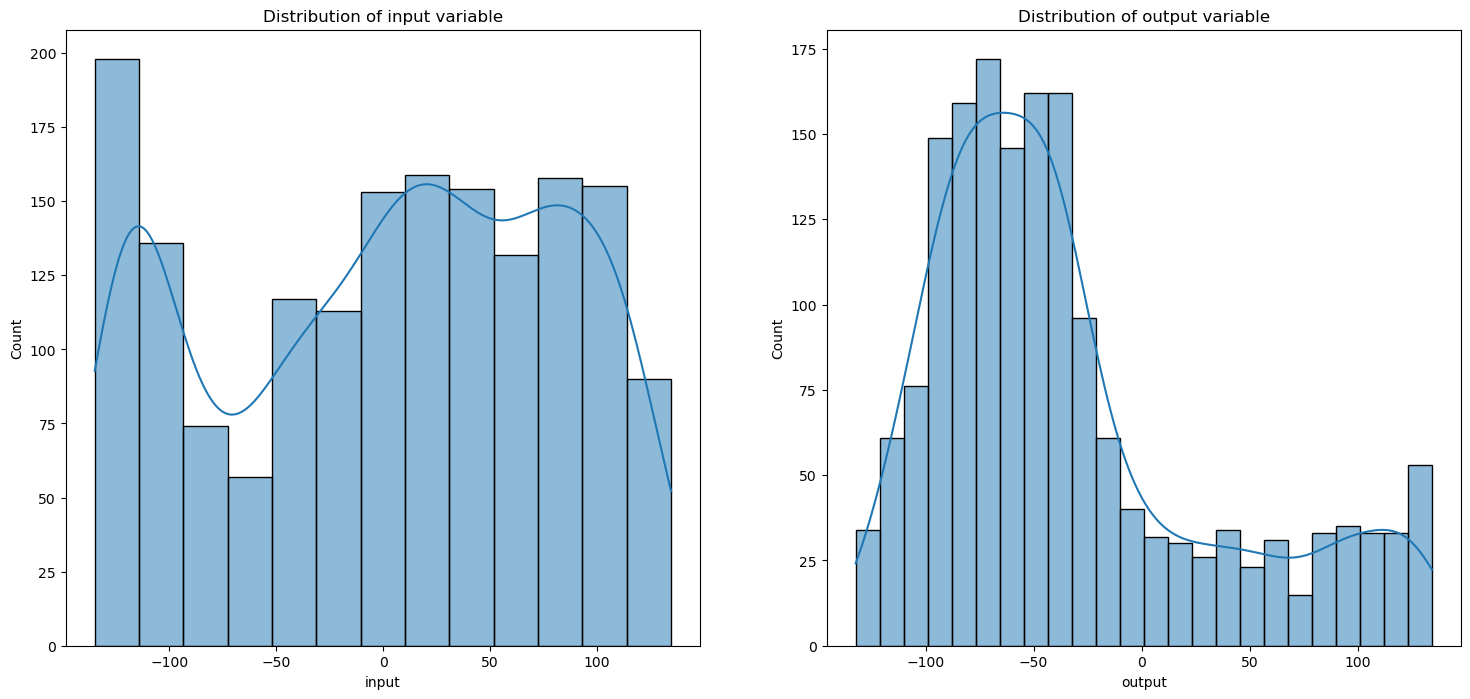

In [199]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.histplot(x=df["input"],kde=True,ax=ax[0])
ax[0].set_title("Distribution of input variable")
sns.histplot(x=df["output"],kde=True,ax=ax[1])
ax[1].set_title("Distribution of output variable")
plt.show()


### observations 
* in case of input variable more no of values lies in range in 0 to 100
* in case of output varibale more no of values lies in range in -100 to -50

### Finding relation

<AxesSubplot:xlabel='input', ylabel='output'>

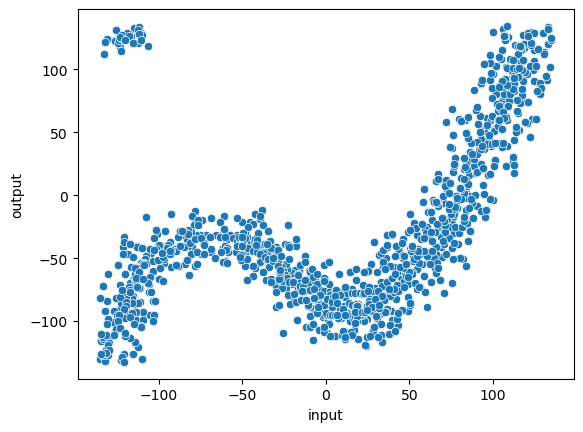

In [200]:
sns.scatterplot(x="input",y="output",data=df)

In [201]:
k=df.corr()

<AxesSubplot:>

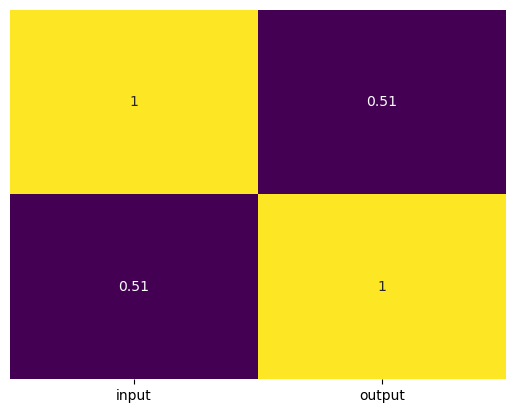

In [202]:
sns.heatmap(k,yticklabels=False,cbar=False,cmap='viridis',annot=True)

### finding outliers for input column

In [203]:
percentile=df["input"].quantile([0.25,0.75]).values
iqr=percentile[1]-percentile[0]
lb=percentile[0]-1.5*(iqr)
ub=percentile[1]+1.5*(iqr)
lb,ub

(-263.86242823000003, 270.74003089)

In [204]:
df["input"][(df["input"]>ub) | (df["input"]<lb)]

Series([], Name: input, dtype: float64)

<AxesSubplot:xlabel='input'>

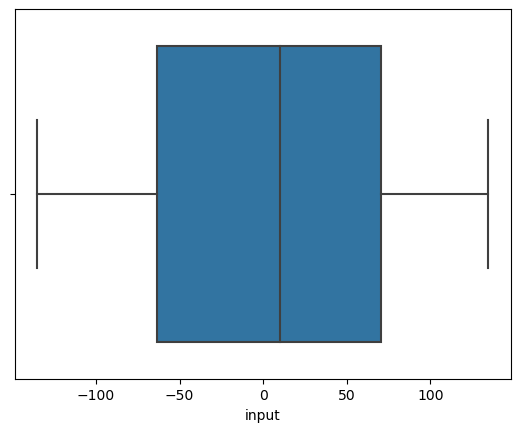

In [205]:
sns.boxplot(x=df["input"])

* by above code we can say there were no outliers in input column

### finding outliers for output column

In [216]:
peroutput=df["output"].quantile([0.25,0.75]).values
iqro=peroutput[1]-peroutput[0]
lbo=peroutput[0]-1.5*(iqro)
ubo=peroutput[1]+1.5*(iqro)
lbo,ubo

(-161.0422459425, 41.577327677499994)

In [217]:
index=df["output"][(df["output"]>ubo) | (df["output"]<lbo)].index
df=df.drop(index,axis=0)

<AxesSubplot:xlabel='output'>

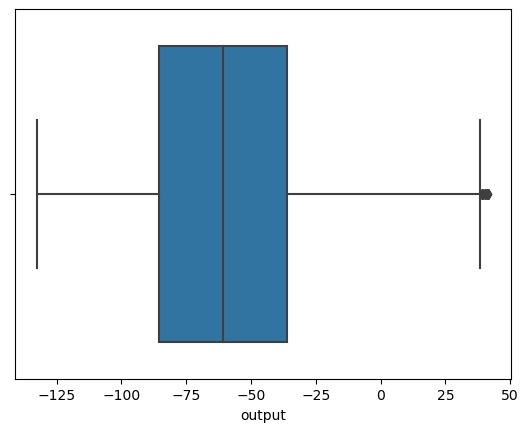

In [218]:
sns.boxplot(x=df["output"])

In [219]:
df.shape

(1430, 2)

<AxesSubplot:xlabel='input', ylabel='output'>

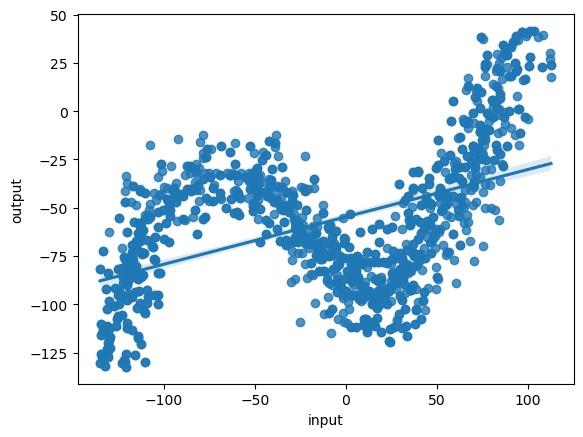

In [220]:
sns.regplot(x='input',y='output',data=df)

In [221]:
df.shape

(1430, 2)

### split the dataset into training and testing (recommended split 75:25)

In [222]:
x=df[["input"]]
y=df["output"]

In [223]:
# split into train and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=42)

In [224]:
x_train.head()

,input
1230,-39.131157
408,82.633331
1162,-98.947718
209,-0.906412
623,18.633331


In [225]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1072, 1) (358, 1)
(1072,) (358,)


### Data Preparation on train data

In [226]:
#for numerical column use standard scaler for train data

In [227]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_num_rescaled = pd.DataFrame(scaler.fit_transform(x_train),
                                    columns = x_train.columns,
                                    index = x_train.index)
x_train_num_rescaled.head()

,input
1230,-0.354449
408,1.363336
1162,-1.198307
209,0.184804
623,0.460460


### Data Transformation on test data

In [228]:
x_test.head()

,input
123,-34.821874
1410,60.143994
595,40.633331
394,73.594282
1229,-53.366669


In [229]:
x_test_num_scaler=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns,index=x_test.index)
x_test_num_scaler.head()

,input
123,-0.293656
1410,1.046069
595,0.770823
394,1.235818
1229,-0.555276


### Model prediction phase
   * Linear Regression
   * Decision Tree Regression
   * Random Forest Regression
   * KNN Regression
   * Support Vector Regression

In [230]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_num_rescaled, y_train)

LinearRegression()

In [231]:
y_test_pred = regressor.predict(x_test_num_scaler)


In [232]:
temp_df = pd.DataFrame({'Actual': list(np.array(y_test)), 'Predicted': list(np.array(y_test_pred))})

temp_df.head()

,Actual,Predicted
0,-28.822508,-62.769897
1,-29.914410,-38.237704
2,-75.000000,-43.277824
3,-10.873400,-34.763140
4,-36.000000,-67.560508


In [233]:
from sklearn import metrics

In [234]:
print('Mean absolute error: ',metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean squared error: ',metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean squared error: ',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

Mean absolute error:  28.44718609019213
Mean squared error:  1111.1806525753113
Root Mean squared error:  33.3343764389753


<AxesSubplot:xlabel='output', ylabel='Count'>

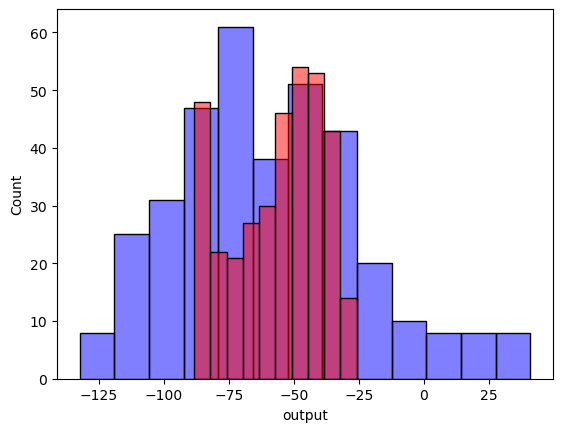

In [235]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

# B) KNeighborsRegression

In [236]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train_num_rescaled, y_train)

KNeighborsRegressor()

In [237]:
y_test_pred = regressor.predict(x_test_num_scaler)

In [238]:
temp_df = pd.DataFrame({'Actual': np.array(y_test), 'Predicted': np.array(y_test_pred)})

temp_df.head()

,Actual,Predicted
0,-28.822508,-45.446811
1,-29.914410,-44.605355
2,-75.000000,-66.290099
3,-10.873400,-9.823429
4,-36.000000,-38.654925


In [239]:
print('Mean absolute error: ',metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean squared error: ',metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean squared error: ',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

Mean absolute error:  15.048678578253629
Mean squared error:  385.37794838366324
Root Mean squared error:  19.63104552446617


<AxesSubplot:xlabel='output', ylabel='Count'>

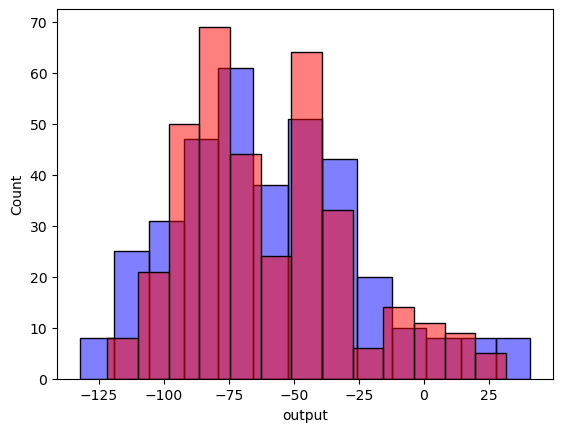

In [240]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

# c)DecisionTreeRegressor

In [241]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train_num_rescaled, y_train)

DecisionTreeRegressor()

In [242]:
y_test_pred = regressor.predict(x_test_num_scaler)

In [243]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
123,-28.822508,-28.822508
1410,-29.914410,-29.914410
595,-75.000000,-77.000000
394,-10.873400,-10.873400
1229,-36.000000,-34.000000


In [244]:
print('Mean absolute error: ',metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean squared error: ',metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean squared error: ',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

Mean absolute error:  7.9948537401362065
Mean squared error:  244.37290805661874
Root Mean squared error:  15.63243129064122


<AxesSubplot:xlabel='output', ylabel='Count'>

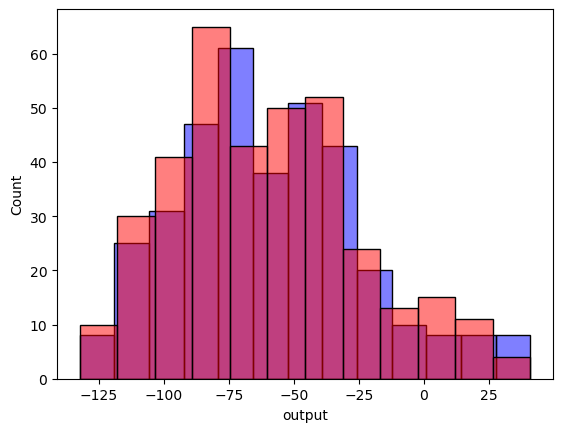

In [245]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

# D) RandomForestRegressor

In [246]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train_num_rescaled, y_train)

RandomForestRegressor()

In [247]:
y_test_pred = regressor.predict(x_test_num_scaler)

In [248]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
123,-28.822508,-37.673015
1410,-29.914410,-46.130503
595,-75.000000,-72.722474
394,-10.873400,-12.095441
1229,-36.000000,-35.586387


In [249]:
print('Mean absolute error: ',metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean squared error: ',metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean squared error: ',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

Mean absolute error:  11.49984940963772
Mean squared error:  268.04075980601704
Root Mean squared error:  16.371950397127918


<AxesSubplot:xlabel='output', ylabel='Count'>

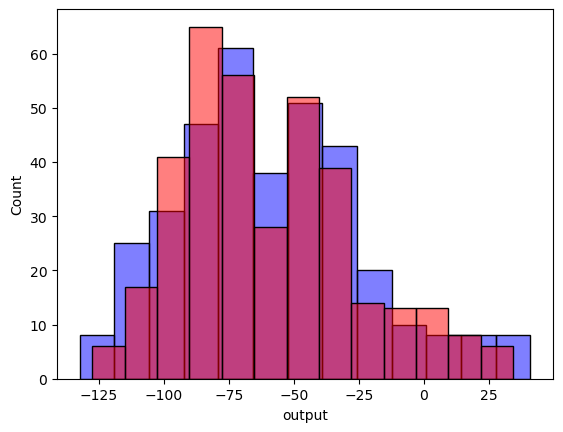

In [250]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

# E) GradientBoostingRegressor

In [251]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(x_train_num_rescaled, y_train)

GradientBoostingRegressor()

In [252]:
y_test_pred = regressor.predict(x_test_num_scaler)

In [253]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
123,-28.822508,-49.627276
1410,-29.914410,-39.273883
595,-75.000000,-64.786889
394,-10.873400,-16.022218
1229,-36.000000,-40.457779


In [254]:
print('Mean absolute error: ',metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean squared error: ',metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean squared error: ',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

Mean absolute error:  13.318994184820971
Mean squared error:  310.9993375759016
Root Mean squared error:  17.635173307226147


<AxesSubplot:xlabel='output', ylabel='Count'>

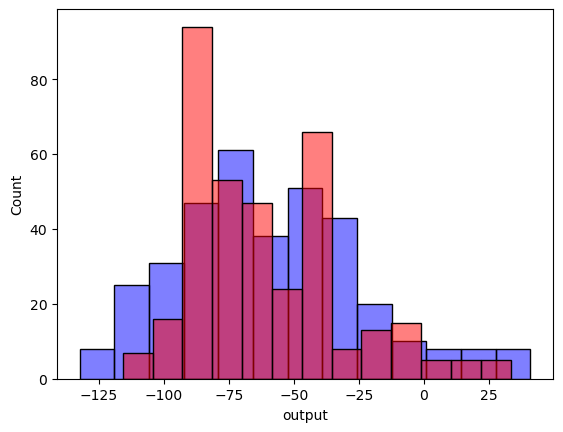

In [255]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [ ]:
Desiciontree regressor is the best model for the above data